# Trimming Messages

### Set the OpenAI API Key as an Environment Variable

In [1]:
%load_ext dotenv
%dotenv
%load_ext mypy_ipython

### Import Relevant Classes and Functions

In [2]:
from langgraph.graph import START, END, StateGraph, add_messages, MessagesState
from typing_extensions import TypedDict
from langchain_openai.chat_models import ChatOpenAI
from langchain_core.messages import AIMessage, HumanMessage, BaseMessage, RemoveMessage
from collections.abc import Sequence
from typing import Literal, Annotated

### Define the Nodes

In [3]:
chat = ChatOpenAI(model = "gpt-4o", 
                  seed = 365, 
                  temperature = 0, 
                  max_completion_tokens = 100)

In [4]:
def ask_question(state: MessagesState) -> MessagesState:
    
    print(f"\n-------> ENTERING ask_question:")
    for i in state["messages"]:
        i.pretty_print()
    
    question = "What is your question?"
    print(question)
    
    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

In [5]:
def chatbot(state: MessagesState) -> MessagesState:
    
    print(f"\n-------> ENTERING chatbot:")
    for i in state["messages"]:
        i.pretty_print()
    
    response = chat.invoke(state["messages"])
    response.pretty_print()
    
    return MessagesState(messages = [response])

In [6]:
def ask_another_question(state: MessagesState) -> MessagesState:
    
    print(f"\n-------> ENTERING ask_another_question:")
    for i in state["messages"]:
        i.pretty_print()
    
    question = "Would you like to ask one more question (yes/no)?"
    print(question)
    
    return MessagesState(messages = [AIMessage(question), HumanMessage(input())])

In [7]:
def trim_messages(state: MessagesState) -> MessagesState:
    print(f"\n-------> ENTERING trim_messages:")
    
    remove_messages = [RemoveMessage(id = i.id) for i in state["messages"][:-5]]
    
    return MessagesState(messages = remove_messages)

### Define the Routing Function

In [8]:
def routing_function(state: MessagesState) -> Literal["trim_messages", "__end__"]:
    
    if state["messages"][-1].content == "yes":
        return "trim_messages"
    else:
        return "__end__"

### Define the Graph

In [9]:
graph = StateGraph(MessagesState)

In [10]:
graph.add_node("ask_question", ask_question)
graph.add_node("chatbot", chatbot)
graph.add_node("ask_another_question", ask_another_question)
graph.add_node("trim_messages", trim_messages)

graph.add_edge(START, "ask_question")
graph.add_edge("ask_question", "chatbot")
graph.add_edge("chatbot", "ask_another_question")
graph.add_conditional_edges(source = "ask_another_question", 
                            path = routing_function)
graph.add_edge("trim_messages", "ask_question")

In [11]:
graph_compiled = graph.compile()

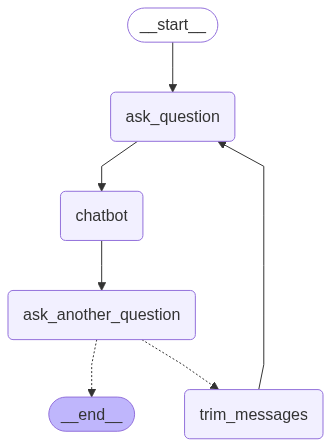

In [12]:
graph_compiled

### Test the Graph

In [14]:
graph_compiled.invoke(MessagesState(messages = []))


-------> ENTERING ask_question:
What is your question?


 What is the shortest bible verse?



-------> ENTERING chatbot:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

What is the shortest bible verse?
================================== Ai Message ==================================

The shortest verse in the Bible is John 11:35, which simply states, "Jesus wept."

-------> ENTERING ask_another_question:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

What is the shortest bible verse?
================================== Ai Message ==================================

The shortest verse in the Bible is John 11:35, which simply states, "Jesus wept."
Would you like to ask one more question (yes/no)?


 yes



-------> ENTERING trim_messages:

-------> ENTERING ask_question:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

What is the shortest bible verse?
================================== Ai Message ==================================

The shortest verse in the Bible is John 11:35, which simply states, "Jesus wept."
================================== Ai Message ==================================

Would you like to ask one more question (yes/no)?
================================ Human Message =================================

yes
What is your question?


 what else did he do?



-------> ENTERING chatbot:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

What is the shortest bible verse?
================================== Ai Message ==================================

The shortest verse in the Bible is John 11:35, which simply states, "Jesus wept."
================================== Ai Message ==================================

Would you like to ask one more question (yes/no)?
================================ Human Message =================================

yes
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

what else did he do?
================================== Ai Message ==================================

In the context of John 11, where the shortest verse "Jesus wept" is found, Jesu

 yes



-------> ENTERING trim_messages:

-------> ENTERING ask_question:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

what else did he do?
================================== Ai Message ==================================

In the context of John 11, where the shortest verse "Jesus wept" is found, Jesus was deeply moved by the death of his friend Lazarus and the grief of Lazarus's sisters, Mary and Martha. After expressing his own sorrow, Jesus went on to perform a significant miracle. He asked for the stone to be removed from Lazarus's tomb, prayed to God, and then called Lazarus to come out. Lazarus, who had been dead for four days, emerged from
================================== Ai Message ==================================

Would you like to ask one more question (yes/no)?
================================ Human Message ================================

 Do you remember the bible verse you told me?



-------> ENTERING chatbot:
================================== Ai Message ==================================

What is your question?
================================ Human Message =================================

what else did he do?
================================== Ai Message ==================================

In the context of John 11, where the shortest verse "Jesus wept" is found, Jesus was deeply moved by the death of his friend Lazarus and the grief of Lazarus's sisters, Mary and Martha. After expressing his own sorrow, Jesus went on to perform a significant miracle. He asked for the stone to be removed from Lazarus's tomb, prayed to God, and then called Lazarus to come out. Lazarus, who had been dead for four days, emerged from
================================== Ai Message ==================================

Would you like to ask one more question (yes/no)?
================================ Human Message =================================

yes
================================

 no


{'messages': [AIMessage(content='What is your question?', additional_kwargs={}, response_metadata={}, id='bfcfd958-0022-4596-87c3-ee31ebf5d836'),
  HumanMessage(content='what else did he do?', additional_kwargs={}, response_metadata={}, id='d8f2e55a-b5a1-4272-ad19-cf969031b219'),
  AIMessage(content='In the context of John 11, where the shortest verse "Jesus wept" is found, Jesus was deeply moved by the death of his friend Lazarus and the grief of Lazarus\'s sisters, Mary and Martha. After expressing his own sorrow, Jesus went on to perform a significant miracle. He asked for the stone to be removed from Lazarus\'s tomb, prayed to God, and then called Lazarus to come out. Lazarus, who had been dead for four days, emerged from', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 100, 'prompt_tokens': 89, 'total_tokens': 189, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_predict